In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data.csv")
df.head()

,entity,year,income_group,gdp_pc,el_access_total,el_access_urban,el_access_rural,population,pop_no_el_access_total,urban_share,...,el_from_solar,el_from_oil,el_from_wind,el_from_bioenergy,renewables_other,el_inst_capacity_total,income_group_num,supply_rate,t_demand,gap
0,Angola,2000,Lower middle income,556.884216,24.238865,44.931600,3.473994,16394067,12100243,50.087,...,0.0,0.53,0.0,0.0,0.0,500.0,2,0.059409,5.940872,4.500872
1,Angola,2001,Lower middle income,527.464111,20.000000,30.000000,9.477077,16941584,13556602,51.274,...,0.0,0.62,0.0,0.0,0.0,500.0,2,0.082000,8.200000,6.560000
2,Angola,2002,Lower middle income,872.657654,26.320255,47.670353,2.759651,17516140,12897117,52.461,...,0.0,0.62,0.0,0.0,0.0,500.0,2,0.066869,6.686865,4.926865
3,Angola,2003,Lower middle income,982.805603,27.355137,49.043540,2.255916,18124346,13144298,53.645,...,0.0,0.75,0.0,0.0,0.0,500.0,2,0.072747,7.274685,5.284685
4,Angola,2004,Lower middle income,1254.696167,28.395485,50.428510,1.653744,18771128,13405173,54.827,...,0.0,0.49,0.0,0.0,0.0,624.0,2,0.078886,7.888578,5.648578


In [5]:
df.shape

(1104, 31)

In [6]:
df.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    1104 non-null   object 
 1   year                      1104 non-null   int64  
 2   income_group              1104 non-null   object 
 3   gdp_pc                    1104 non-null   float64
 4   el_access_total           1104 non-null   float64
 5   el_access_urban           1104 non-null   float64
 6   el_access_rural           1104 non-null   float64
 7   population                1104 non-null   int64  
 8   pop_no_el_access_total    1104 non-null   int64  
 9   urban_share               1104 non-null   float64
 10  el_generation             1104 non-null   float64
 11  el_demand                 1104 non-null   float64
 12  net_imports               1104 non-null   float64
 13  el_generation_pc          1104 non-null   float64
 14  el_deman

In [8]:
df.isna().sum()

entity                      0
year                        0
income_group                0
gdp_pc                      0
el_access_total             0
el_access_urban             0
el_access_rural             0
population                  0
pop_no_el_access_total      0
urban_share                 0
el_generation               0
el_demand                   0
net_imports                 0
el_generation_pc            0
el_demand_pc                0
final_energy_consumption    0
fin_support                 0
el_from_coal                0
el_from_gas                 0
el_from_nuclear             0
el_from_hydro               0
el_from_solar               0
el_from_oil                 0
el_from_wind                0
el_from_bioenergy           0
renewables_other            0
el_inst_capacity_total      0
income_group_num            0
supply_rate                 0
t_demand                    0
gap                         0
dtype: int64

In [9]:
df.describe([0.1, 0.25, 0.5, 0.75, 0.95,1.0]).T

,count,mean,std,min,10%,25%,50%,75%,95%,100%,max
year,1104.0,2.011000e+03,6.636256e+00,2.000000e+03,2002.000000,2.005000e+03,2.011000e+03,2.017000e+03,2.021000e+03,2.022000e+03,2.022000e+03
gdp_pc,1104.0,2.012555e+03,2.874185e+03,1.104609e+02,324.870383,5.068356e+02,8.571074e+02,1.941656e+03,8.170784e+03,1.984972e+04,1.984972e+04
el_access_total,1104.0,3.994580e+01,2.595091e+01,1.279584e+00,8.917386,1.696954e+01,3.713982e+01,5.650000e+01,8.998650e+01,1.000000e+02,1.000000e+02
el_access_urban,1104.0,6.594071e+01,2.279117e+01,3.500000e+00,33.509759,4.988736e+01,6.885090e+01,8.514721e+01,9.800000e+01,1.000000e+02,1.000000e+02
el_access_rural,1104.0,2.247927e+01,2.543634e+01,0.000000e+00,1.265233,3.274249e+00,1.377245e+01,3.165667e+01,8.286998e+01,1.000000e+02,1.000000e+02
population,1104.0,1.891110e+07,2.934209e+07,8.007300e+04,940419.300000,2.130476e+06,1.048111e+07,2.164752e+07,6.896424e+07,2.167834e+08,2.167834e+08
pop_no_el_access_total,1104.0,1.147146e+07,1.628030e+07,1.440000e+02,204872.500000,1.177133e+06,7.195126e+06,1.303478e+07,5.460317e+07,9.291402e+07,9.291402e+07
urban_share,1104.0,4.104729e+01,1.708635e+01,8.246000e+00,17.860500,2.844150e+01,3.978350e+01,5.198175e+01,7.221185e+01,9.073500e+01,9.073500e+01
el_generation,1104.0,8.593324e+00,3.523579e+01,2.000000e-02,0.120000,2.800000e-01,1.065000e+00,5.162500e+00,1.771700e+01,2.634900e+02,2.634900e+02
el_demand,1104.0,8.651404e+00,3.483122e+01,2.000000e-02,0.150000,3.500000e-01,1.475000e+00,4.827500e+00,1.657650e+01,2.603400e+02,2.603400e+02


<Axes: >

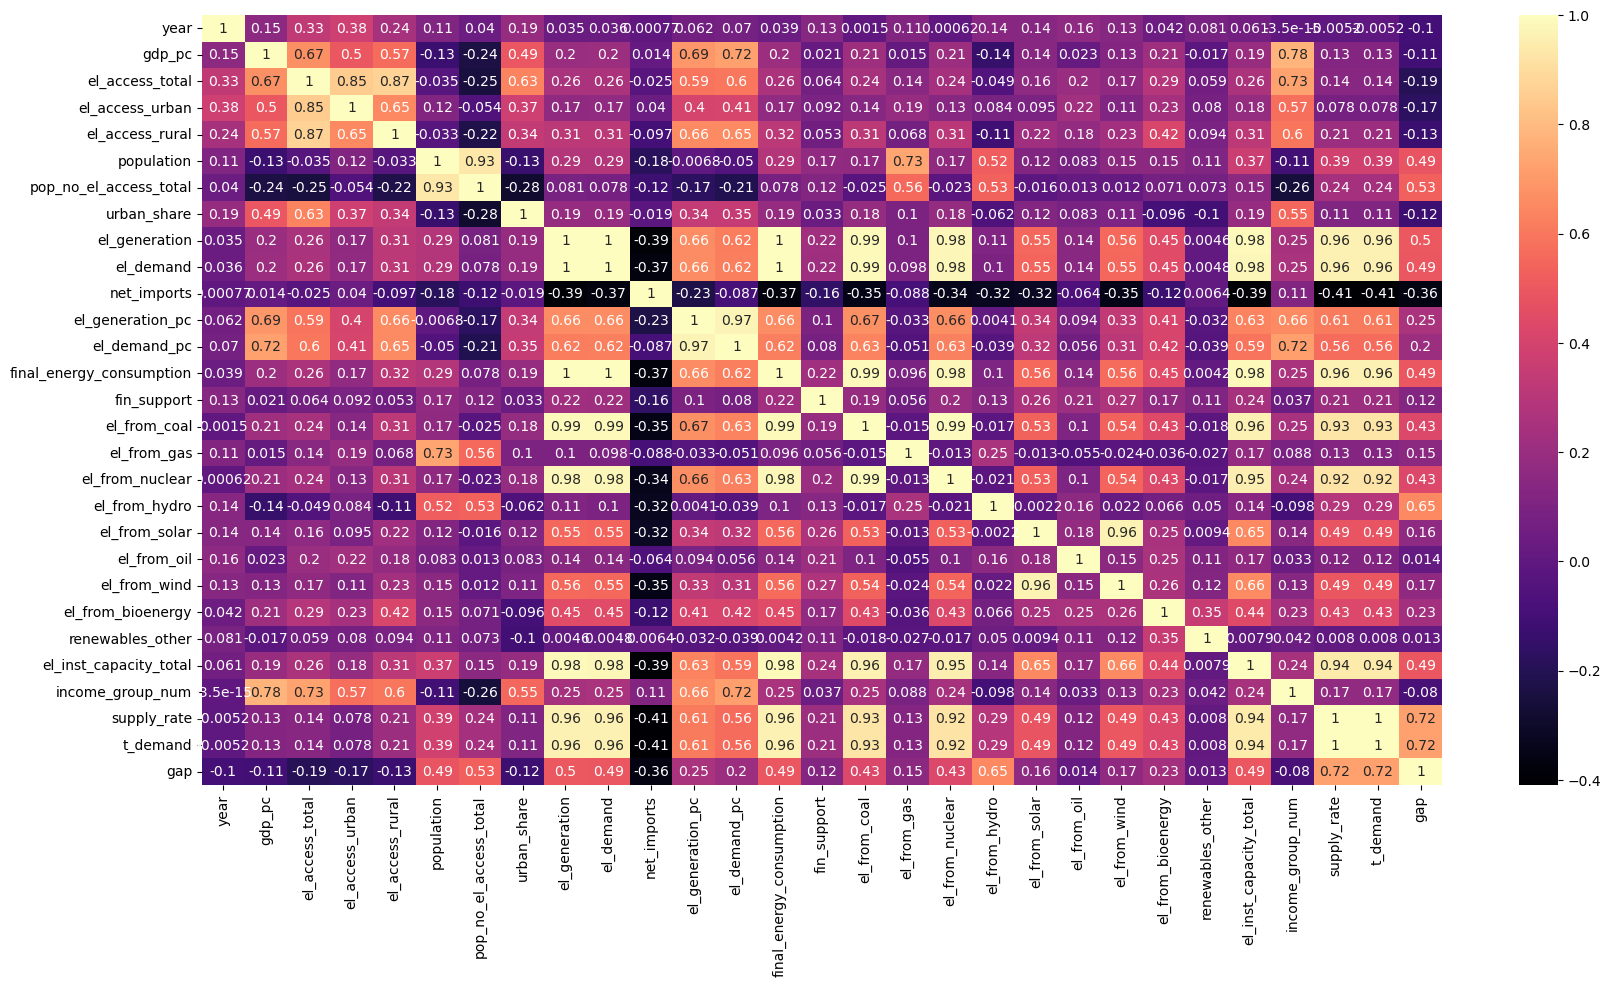

In [10]:
dg=df[['year', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap']]
plt.figure(figsize=(20,10))
sns.heatmap(dg.corr(), annot=True, cmap="magma")

In [11]:
df_no=df[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']]

Plotting Electricity Supply vs Gap 

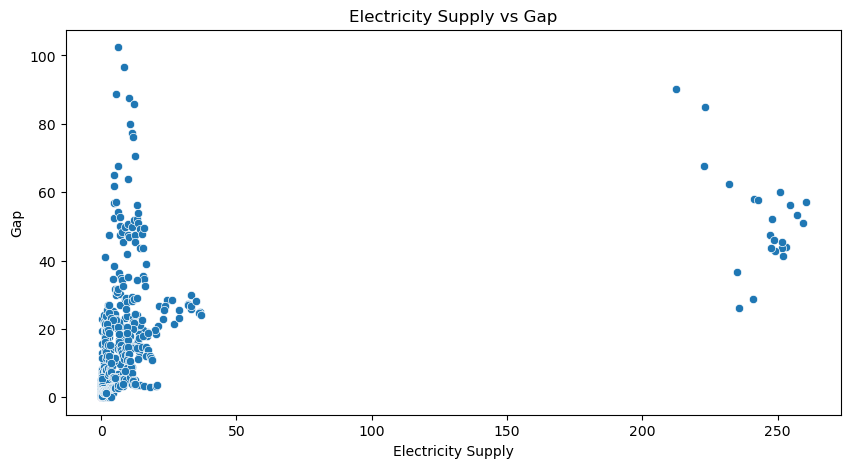

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='el_demand', y='gap')
plt.xlabel('Electricity Supply')
plt.ylabel('Gap')
plt.title('Electricity Supply vs Gap')
plt.show()

Plotting the features Electricity Demand vs Gap

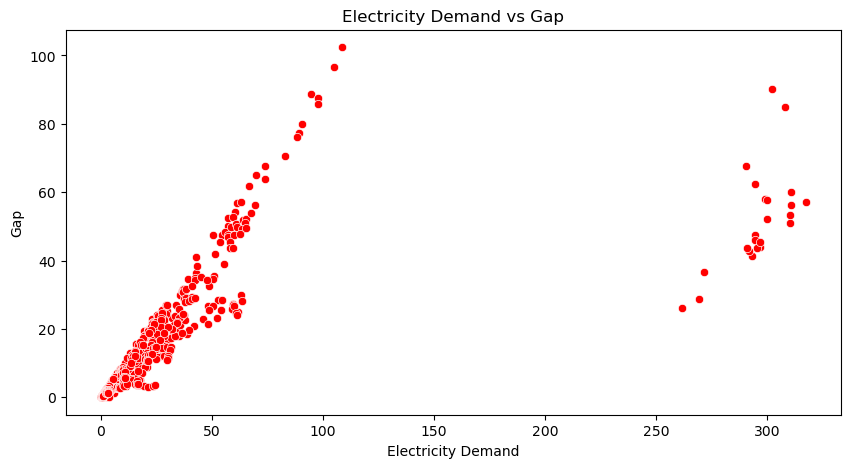

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='t_demand', y='gap', color='red')
plt.xlabel('Electricity Demand')
plt.ylabel('Gap')
plt.title('Electricity Demand vs Gap')
plt.show()

In [14]:
df_na=df[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc',"supply_rate",'t_demand']]

In [15]:
df_na.shape

(1104, 17)

#Gap Creation

In [16]:

#supply rate
df_na['supply_rate']=df_na['el_demand']/df_na['el_access_total']
#t_demand1
df_na['t_demand']=100*df_na['supply_rate']
#gap1
df_na['gap']=df_na['t_demand']-df_na['el_demand']
#gap2
#df_no['gap2']=df_no['pop_no_el_access_total']*df_no['el_demand_pc']/1000000
#t_demand2
#df_no['t_demand2']=df_no['el_demand']+df_no['gap2']
#df_no.head()

In [17]:
df_na.head()

,entity,el_access_urban,el_demand,el_access_rural,population,net_imports,el_demand_pc,fin_support,el_from_gas,pop_no_el_access_total,urban_share,income_group_num,year,el_access_total,gdp_pc,supply_rate,t_demand,gap
0,Angola,44.931600,1.44,3.473994,16394067,0.0,0.09,0.00,0.0,12100243,50.087,2,2000,24.238865,556.884216,0.059409,5.940872,4.500872
1,Angola,30.000000,1.64,9.477077,16941584,0.0,0.10,0.00,0.0,13556602,51.274,2,2001,20.000000,527.464111,0.082000,8.200000,6.560000
2,Angola,47.670353,1.76,2.759651,17516140,0.0,0.10,0.00,0.0,12897117,52.461,2,2002,26.320255,872.657654,0.066869,6.686865,4.926865
3,Angola,49.043540,1.99,2.255916,18124346,0.0,0.11,0.05,0.0,13144298,53.645,2,2003,27.355137,982.805603,0.072747,7.274685,5.284685
4,Angola,50.428510,2.24,1.653744,18771128,0.0,0.12,0.04,0.0,13405173,54.827,2,2004,28.395485,1254.696167,0.078886,7.888578,5.648578


In [18]:
df_no=df_na[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc',"supply_rate",'t_demand','gap']]

dff=df_no.iloc[:1050,:]
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
el_access_urban,1050.0,6.560697e+01,2.307644e+01,3.500000e+00,4.953085e+01,6.835647e+01,8.490960e+01,1.000000e+02
el_demand,1050.0,8.591038e+00,3.570798e+01,2.000000e-02,3.300000e-01,1.395000e+00,3.960000e+00,2.603400e+02
el_access_rural,1050.0,2.287615e+01,2.591843e+01,0.000000e+00,3.078979e+00,1.388971e+01,3.235701e+01,1.000000e+02
population,1050.0,1.895217e+07,2.999753e+07,8.007300e+04,2.037904e+06,9.428412e+06,2.190608e+07,2.167834e+08
net_imports,1050.0,3.512381e-02,1.027284e+00,-6.630000e+00,0.000000e+00,0.000000e+00,1.575000e-01,1.233000e+01
el_demand_pc,1050.0,5.247524e-01,9.724342e-01,1.000000e-02,7.000000e-02,1.500000e-01,4.100000e-01,5.820000e+00
fin_support,1050.0,4.614642e+01,2.081984e+02,0.000000e+00,0.000000e+00,2.200000e-01,1.643500e+01,4.951880e+03
el_from_gas,1050.0,8.044667e-01,3.329546e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,2.897000e+01
pop_no_el_access_total,1050.0,1.146261e+07,1.662967e+07,1.440000e+02,1.163590e+06,6.157096e+06,1.332740e+07,9.291402e+07
urban_share,1050.0,4.137301e+01,1.740702e+01,8.246000e+00,2.816750e+01,4.048600e+01,5.274750e+01,9.073500e+01


**Note:** dff = df_no.iloc[:1050, :] in the previous cell <br>
This line creates another DataFrame dff that contains only the first 1050 rows of df_no. <br>The iloc method is used for integer-location based indexing to select rows and columns by their positions.

##Using Gradient Boosting

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load your dataframe
dff_pr = df  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', "supply_rate",'t_demand','gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Ensure non-negative gap values if negative gaps don't make sense in context
y = y.abs()

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")



X_train shape: (883, 16)
X_test shape: (221, 16)
y_train shape: (883,)
y_test shape: (221,)
entities_train shape: (883,)
entities_test shape: (221,)


**Note** This setup is preparing the data for training a machine learning model (Here we used the GradientBoostingRegressor), ensuring the data is clean and standardized, and splitting it into training and testing sets for model evaluation.

In [20]:
# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Arrays to store MAE and RMSE at each stage
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Train the model stage by stage and record errors
for i in range(1, model.n_estimators + 1):
    temp_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, max_depth=3, random_state=42)
    temp_model.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = temp_model.predict(X_train)

    # Predict on test set
    y_test_pred = temp_model.predict(X_test)

     # Store the final predictions
    final_y_test_pred = y_test_pred

    # Calculate errors
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    train_rmse.append(mean_squared_error(y_train, y_train_pred, squared=False))
    test_rmse.append(mean_squared_error(y_test, y_test_pred, squared=False))



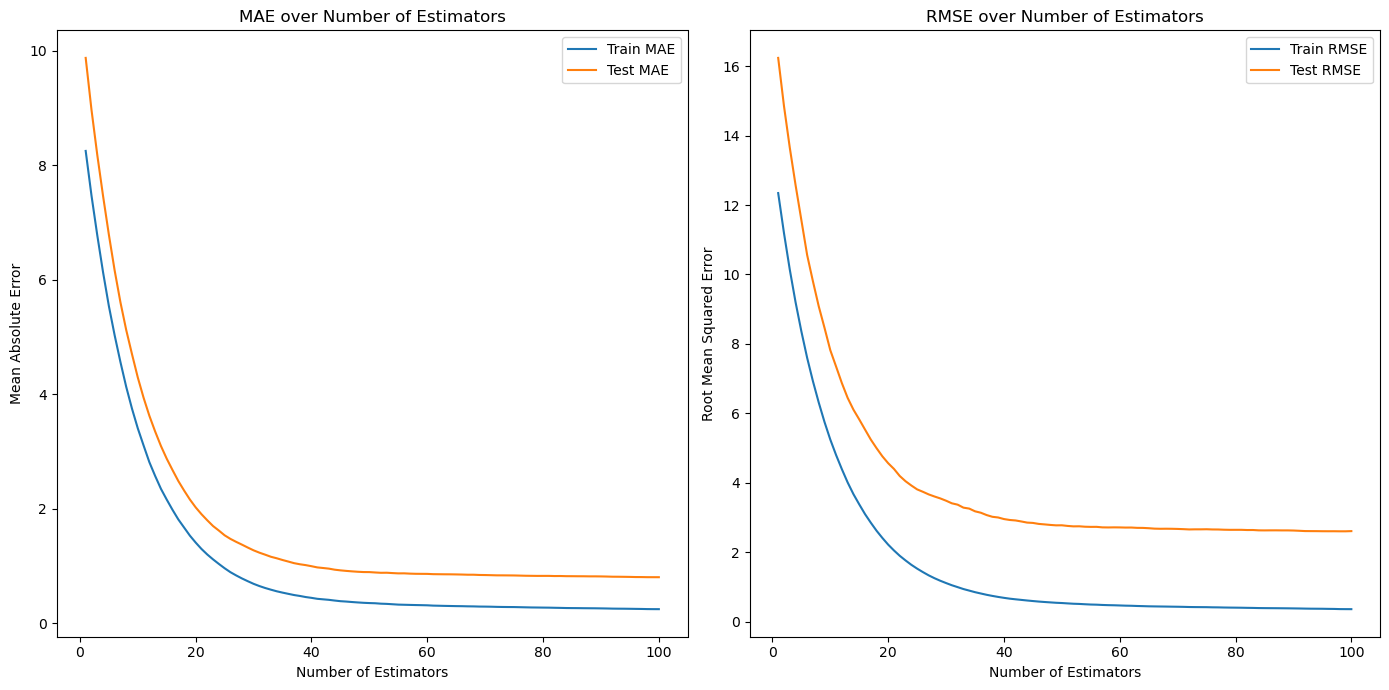

In [21]:
# Plot the errors
plt.figure(figsize=(14, 7))

# MAE plot
plt.subplot(1, 2, 1)
plt.plot(range(1, model.n_estimators + 1), train_mae, label='Train MAE')
plt.plot(range(1, model.n_estimators + 1), test_mae, label='Test MAE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('MAE over Number of Estimators')
plt.legend()

# RMSE plot
plt.subplot(1, 2, 2)
plt.plot(range(1, model.n_estimators + 1), train_rmse, label='Train RMSE')
plt.plot(range(1, model.n_estimators + 1), test_rmse, label='Test RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE over Number of Estimators')
plt.legend()

plt.tight_layout()
plt.show()




In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load your dataframe
dff_pr = df  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', "supply_rate",'t_demand','gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Ensure non-negative gap values if negative gaps don't make sense in context
y = y.abs()

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Arrays to store MAE and RMSE at each stage
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Variable to store the final predictions
final_y_test_pred = None

# Train the model stage by stage and record errors
for i in range(1, model.n_estimators + 1):
    temp_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, max_depth=3, random_state=42)
    temp_model.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = temp_model.predict(X_train)

    # Predict on test set
    y_test_pred = temp_model.predict(X_test)

    # Calculate errors
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    train_rmse.append(mean_squared_error(y_train, y_train_pred, squared=False))
    test_rmse.append(mean_squared_error(y_test, y_test_pred, squared=False))

    # Store the final predictions
    final_y_test_pred = y_test_pred





X_train shape: (883, 16)
X_test shape: (221, 16)
y_train shape: (883,)
y_test shape: (221,)
entities_train shape: (883,)
entities_test shape: (221,)


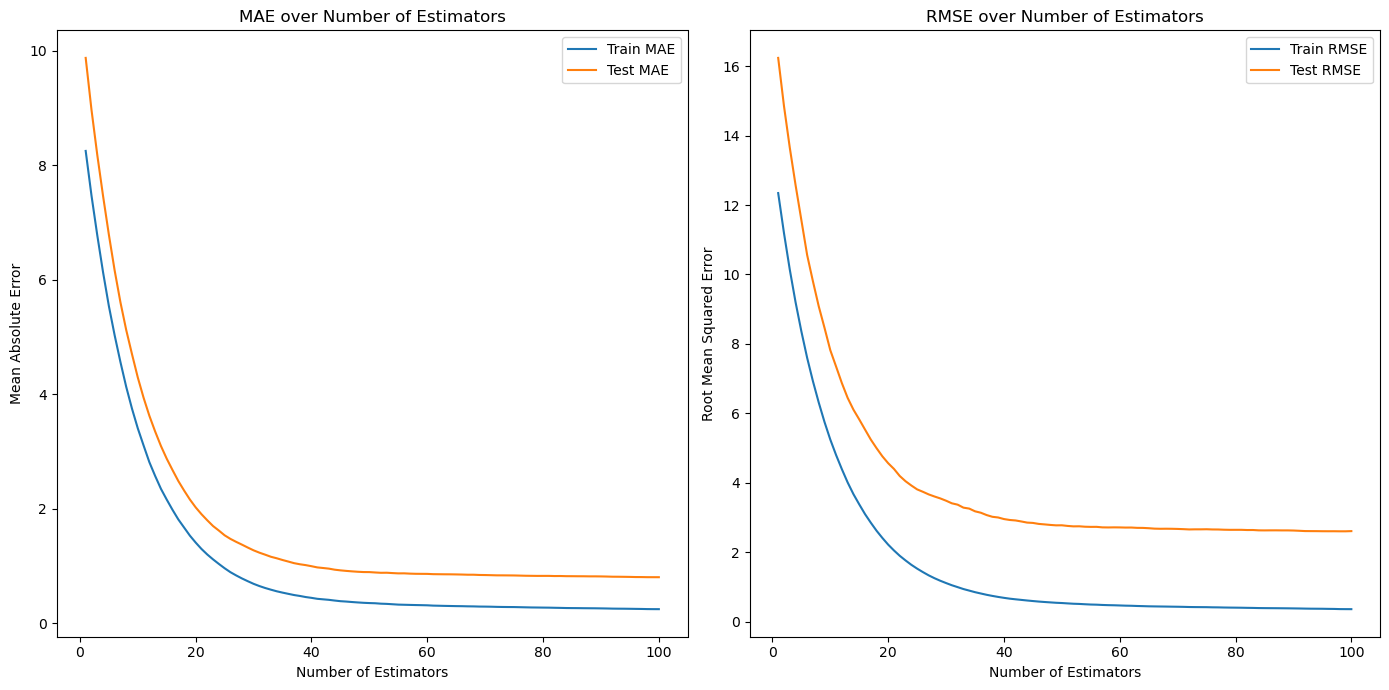

Final Mean Absolute Error (MAE): 0.8021326826956854
Final Root Mean Squared Error (RMSE): 2.6054653087145847


In [23]:
# Plot the errors
plt.figure(figsize=(14, 7))

# MAE plot
plt.subplot(1, 2, 1)
plt.plot(range(1, model.n_estimators + 1), train_mae, label='Train MAE')
plt.plot(range(1, model.n_estimators + 1), test_mae, label='Test MAE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('MAE over Number of Estimators')
plt.legend()

# RMSE plot
plt.subplot(1, 2, 2)
plt.plot(range(1, model.n_estimators + 1), train_rmse, label='Train RMSE')
plt.plot(range(1, model.n_estimators + 1), test_rmse, label='Test RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE over Number of Estimators')
plt.legend()

plt.tight_layout()
plt.show()

# Print final errors using the last fitted temp_model
final_mae = mean_absolute_error(y_test, final_y_test_pred)
final_rmse = mean_squared_error(y_test, final_y_test_pred, squared=False)

print(f"Final Mean Absolute Error (MAE): {final_mae}")
print(f"Final Root Mean Squared Error (RMSE): {final_rmse}")


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe
dff_pr = df  # replace with your actual data file

# Assuming the relevant features are the columns you've mentioned earlier
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total',"supply_rate",'t_demand','gdp_pc']

# Ensure no missing values in the selected features
dff_pr = dff_pr.dropna(subset=features)

# Prepare the data for modeling
X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

X_train shape: (883, 16)
X_test shape: (221, 16)
y_train shape: (883,)
y_test shape: (221,)
entities_train shape: (883,)
entities_test shape: (221,)


#GradientBoosting2

This code below (i.e 2nd GradientBoosting) trains and evaluates a machine learning model on the prepared data.
<br> It's outcome is the trained model's performance metrics (MAE, MSE, RMSE).
<br> The previous GradientBoosting above was preparing the data (handling missing values, splitting into train/test sets, and standardizing features). <br>It's outcome was ready-to-use training and test sets.
<br><br>
These steps are typically performed sequentially in a machine learning pipeline: first, data preparation, and then model training and evaluation. If you need more details or further steps, please let me know!








In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.8021326826956854
Mean Squared Error (MSE): 6.788449474915186
Root Mean Squared Error (RMSE): 2.6054653087145847


     Entity     Actual  Predicted
0  Djibouti   0.276666   0.170993
1    Uganda  16.177778  13.824774
2  Eswatini   1.077630   1.096741
3    Guinea   1.407353   1.443862
4     Kenya   3.966316   4.620905


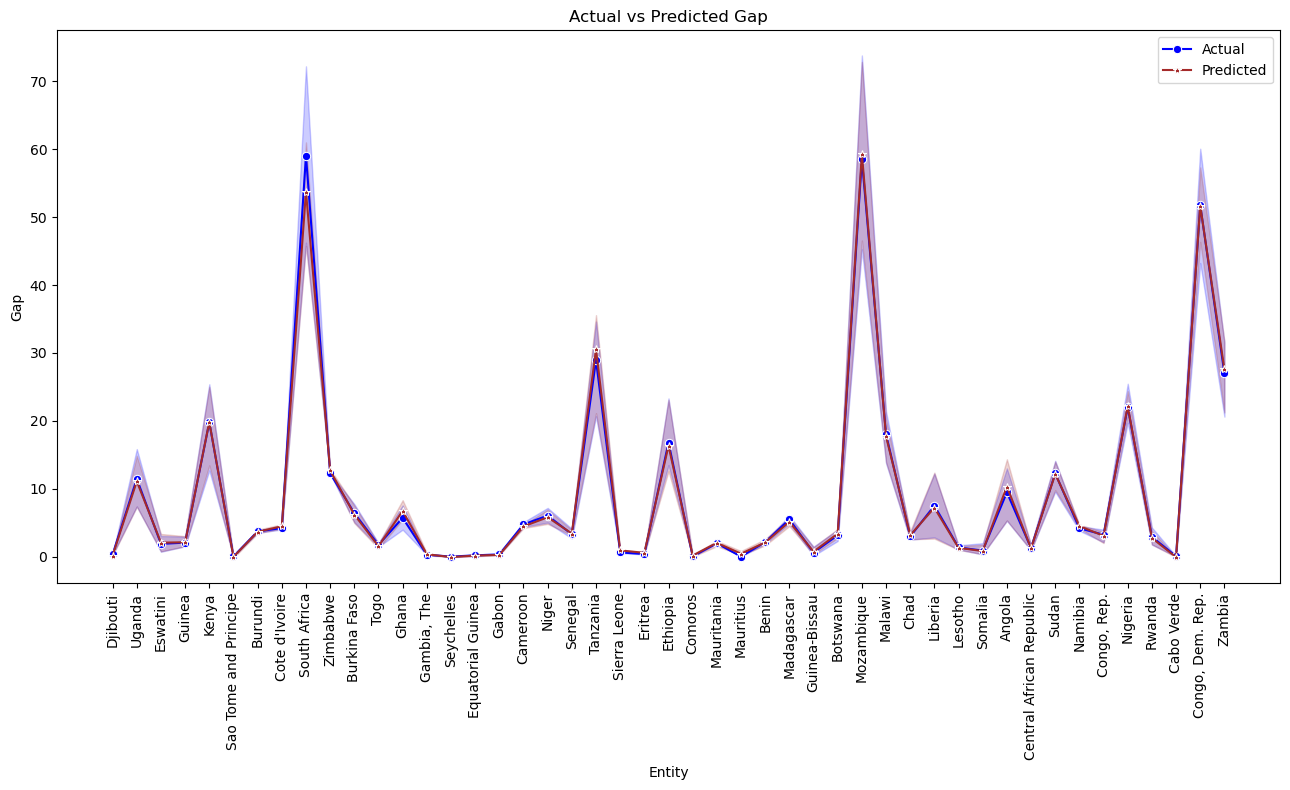

In [26]:
# Predicting future values (for demonstration, using the test set)
future_gap_forecast = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': future_gap_forecast
}).reset_index(drop=True)

print(results_df.head())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o', c='blue')
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='*',c='brown')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()


Install all relevant libraries

In [25]:
conda install tensorflow #Tensorflow is already installed on my conda environment so no need to run this cell again

^C

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your dataframe
dff_pr = pd.read_csv("data.csv") # replace with your actual data file

# Ensure no missing values in the selected features
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total',"supply_rate",'t_demand','gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")


X_train shape: (662, 16)
X_test shape: (442, 16)
y_train shape: (662,)
y_test shape: (442,)
entities_train shape: (662,)
entities_test shape: (442,)


In [28]:
# Define the FNN model with dropout regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Increase dropout rate
    Dense(32, activation='relu'),
    Dropout(0.5),  # Increase dropout rate
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=0)

# Evaluate the model on training and test sets
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Find the lowest train and test loss from the history
lowest_train_loss = np.min(history.history['loss'])
lowest_test_loss = np.min(history.history['val_loss'])

print(f"Lowest Train Loss: {lowest_train_loss}")
print(f"Lowest Test Loss: {lowest_test_loss}")


Train Loss: 7.548151969909668
Test Loss: 14.295815467834473
Lowest Train Loss: 19.110530853271484
Lowest Test Loss: 10.4645414352417


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
     Entity     Actual  Predicted
0  Djibouti   0.276666   0.750294
1    Uganda  16.177778  15.852555
2  Eswatini   1.077630   0.918170
3    Guinea   1.407353   1.554826
4     Kenya   3.966316   5.311650


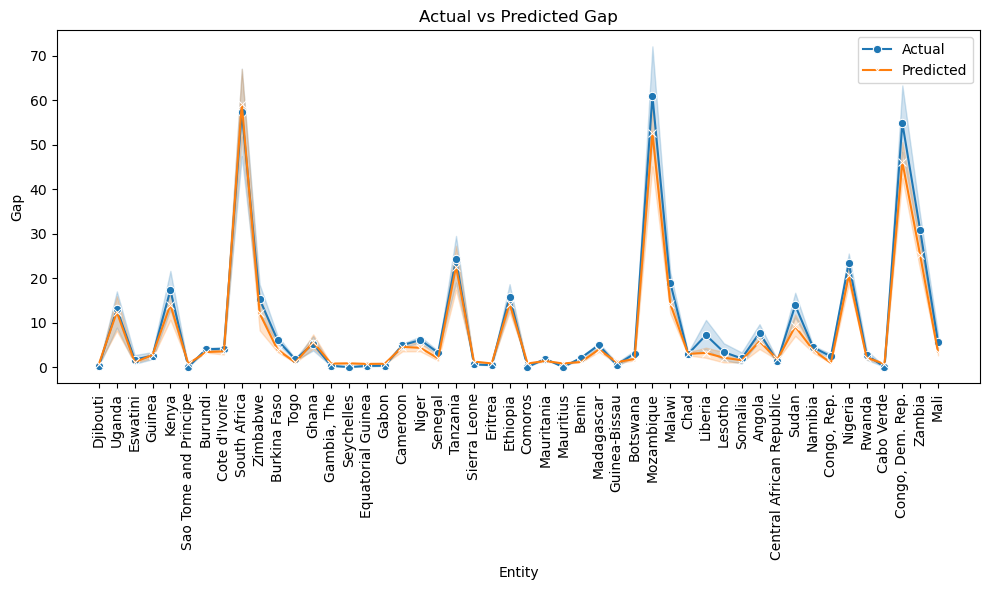

In [29]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
}).reset_index(drop=True)

print(results_df.head())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o')
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='x')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()


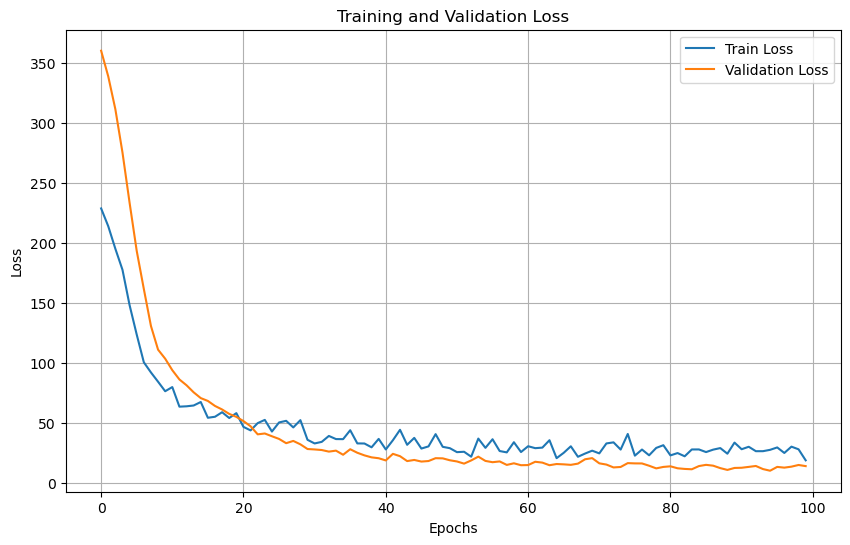

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

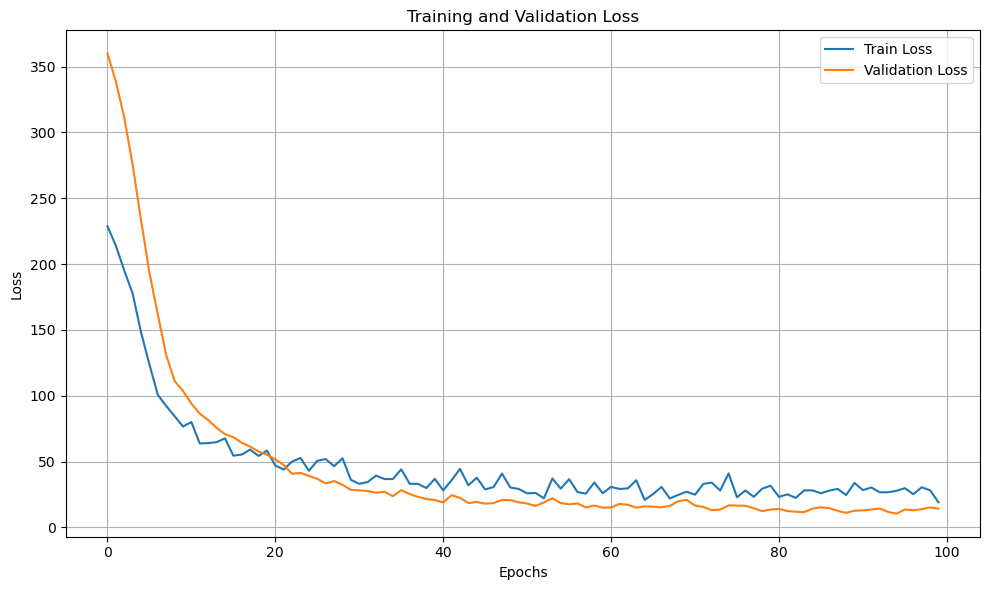

In [31]:
# Plotting the loss trend
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load your dataframe
dff_pr = pd.read_csv("data.csv") # replace with your actual data file

# Ensure no missing values in the selected features
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']


# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")


X_train shape: (883, 1, 14)
X_test shape: (221, 1, 14)
y_train shape: (883,)
y_test shape: (221,)
entities_train shape: (883,)
entities_test shape: (221,)


This code below defines, compiles, trains, and evaluates a Long Short-Term Memory (LSTM) model for a regression task

In [33]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 271.7024 - val_loss: 279.4450
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 203.3555 - val_loss: 274.6345
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 248.4243 - val_loss: 267.2220
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 210.1235 - val_loss: 256.2452
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 258.0264 - val_loss: 240.1170
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174.0054 - val_loss: 221.3592
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 231.3742 - val_loss: 200.5150
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 207.3787 - val_loss: 178.7572
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 205.9879 - val_loss: 158.6627
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 157.0629 - val_loss: 142.8364
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.4138 - val_loss: 129.3504
Epoch 12/100
23/23

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
       Entity     Actual  Predicted
216    Uganda   5.703273   6.977398
217  Djibouti   0.341294   1.341606
218     Sudan  14.709853   7.395646
219   Somalia   1.979119   5.897620
220     Niger   6.122778   4.780787


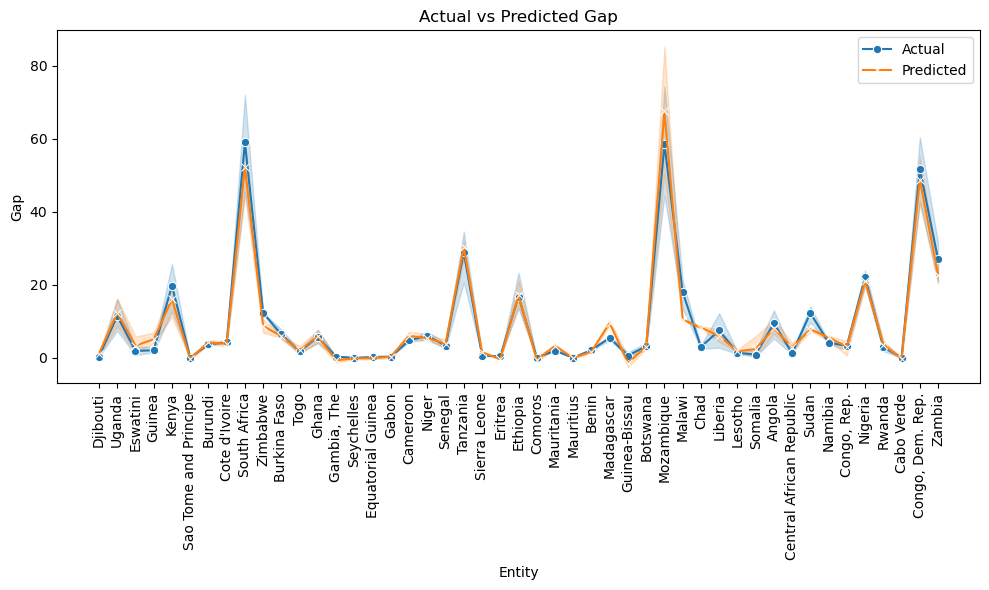

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
}).reset_index(drop=True)

print(results_df.tail())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o')
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='x')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()


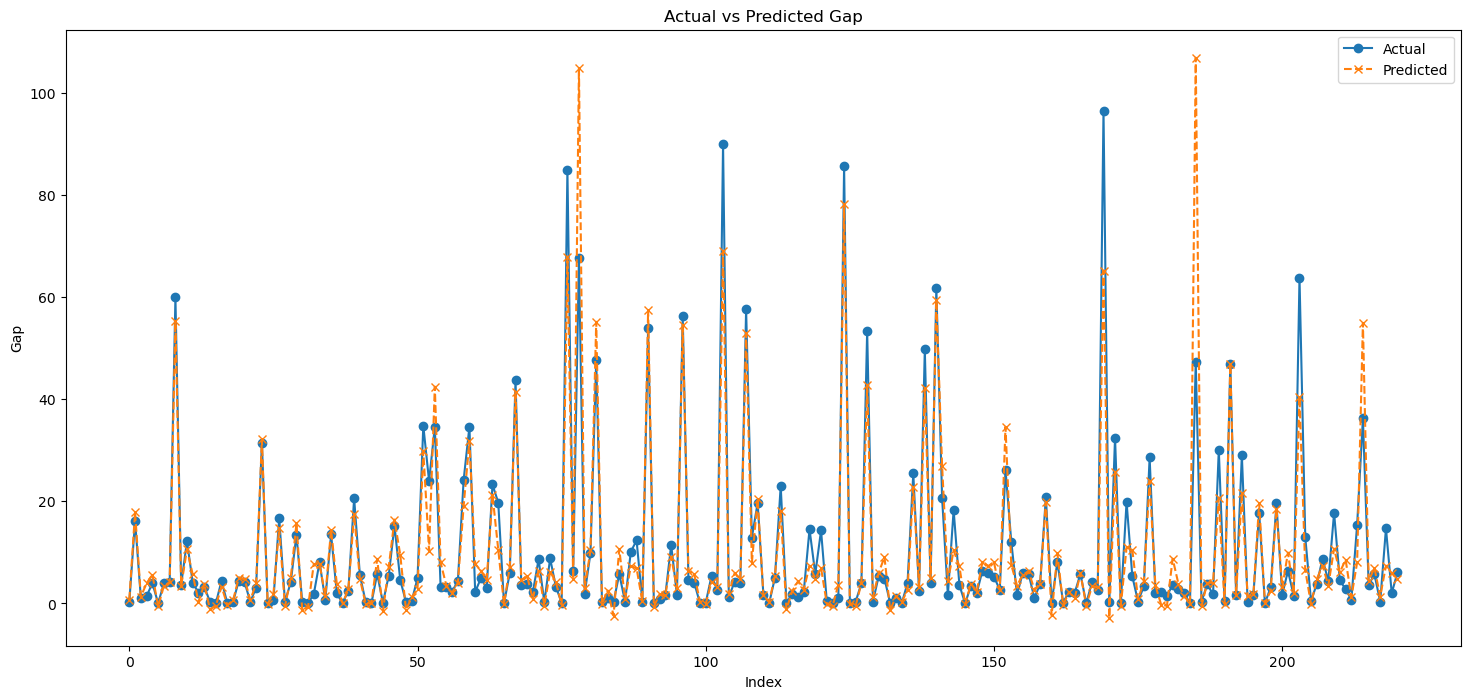

In [35]:
# Plot the actual vs predicted values
plt.figure(figsize=(18, 8))
plt.plot(results_df.index, results_df['Actual'], label='Actual', marker='o', linestyle='-')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', marker='x', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.show()

In [36]:
df = pd.read_csv('data.csv')
df.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap'],
      dtype='object')

##THE CHOSEN MODEL

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load your dataframe
dff_pr = df  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc', 't_demand',"supply_rate"]

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Ensure non-negative gap values if negative gaps don't make sense in context
y = y.abs()

# Convert categorical features to numerical using one-hot encoding
# X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Make predictions
y2_pred = model.predict(X_test)

# Ensure y_test and y_pred are 1-dimensional
y_test = y_test.values  # Convert y_test to a numpy array if it's a pandas Series
y2_pred = y2_pred.flatten()  # Flatten y_pred to ensure it's 1-dimensional

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y2_pred))
mae = mean_absolute_error(y_test, y2_pred)

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")

X_train shape: (883, 1, 16)
X_test shape: (221, 1, 16)
y_train shape: (883,)
y_test shape: (221,)
entities_train shape: (883,)
entities_test shape: (221,)
Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 213.0002 - val_loss: 277.5858
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 207.5103 - val_loss: 268.7907
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 201.8995 - val_loss: 256.6254
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 193.4025 - val_loss: 239.4832
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 179.9734 - val_loss: 217.4853
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 163.5995 - val_loss: 193.0599
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 145.6638 - val_loss: 168.2355
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 127.8699 - val_loss: 144.7595
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109.5612 - val_loss: 124.2265
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

Making Predictions

In [38]:

# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred_abs = np.abs(y_pred)  # Take absolute values of y_pred

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred_abs  # Use y_pred_abs instead of y_pred
})

print(results_df.head())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
        Entity     Actual  Predicted
309   Djibouti   0.276666   0.614716
1041    Uganda  16.177778  15.423750
381   Eswatini   1.077630   1.009239
497     Guinea   1.407353   2.230033
551      Kenya   3.966316   5.481367


##THE CHOSEN MODEL TREND

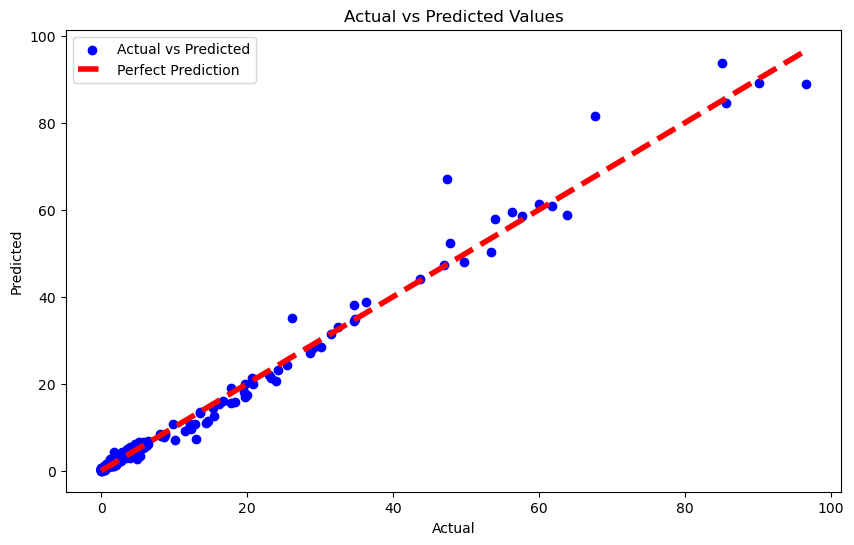

In [39]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_abs, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Checking and Saving the model

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import joblib

# Load your dataframe
dff = pd.read_csv('data.csv')  # Replace with your actual data file

# Feature engineering for the 'gap' variable
dff['supply_rate'] = dff['el_demand'] / dff['el_access_total']
dff['t_demand'] = 100 * dff['supply_rate']
dff['gap'] = dff['t_demand'] - dff['el_demand']

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Prepare the data for modeling
dff = dff.dropna(subset=features)
X = dff[features]
y = dff['gap']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Save the model
model.save('Elec_model.h5')

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 256.1113 - val_loss: 273.0843
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 233.5557 - val_loss: 250.7421
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 216.1238 - val_loss: 224.6887
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189.5248 - val_loss: 195.7874
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 164.9170 - val_loss: 169.2102
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144.5878 - val_loss: 148.1735
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 125.4751 - val_loss: 133.7789
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 114.4715 - val_loss: 123.8388
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.1538 - val_loss: 115.3904
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 101.0808 - val_loss: 108.3084
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 96.0398 - val_loss: 102.2176
Epoch 12/100
17/1

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2211 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3388
Train Loss: 14.303589820861816
Test Loss: 34.75815200805664
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train MSE: 14.303589787407079
Test MSE: 34.75815257083047


In [27]:
%pip install typing-extensions

^C
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip list


Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrit

Defaulting to user installation because normal site-packages is not writeable


In [29]:
conda install conda-forge/label/cf202003::typing_extensions

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining @/win-64::__win==0=0:  75%|███████▌  | 3/4 [00:01<00:00, 12.34it/s]
                                                                             

Examining conflict for python tensorflow:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                               

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow -> python[version='3.10.*|3.9.*|3.8.*|3.7.*|3.6.*|3.5.*']

Your python: python=3.11

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [ ]:
conda install -c anaconda streamlit



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: c:\ProgramData\anaconda3




Solving environment: ...working... done

## Package Plan ##

  environment location: c:\ProgramData\anaconda3

  added / updated specs:
    - streamlit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-5.0.1               |  py311haa95532_0         833 KB  anaconda
    blinker-1.6.2              |  py311haa95532_0          33 KB  anaconda
    ca-certificates-2023.08.22 |       haa95532_0         161 KB  anaconda
    cachetools-4.2.2           |     pyhd3eb1b0_0          13 KB  anaconda
    certifi-2023.11.17         |  py311haa95532_0         161 KB  anaconda
    gitdb-4.0.7                |     pyhd3eb1b0_0          47 KB  anaconda
    gitpython-3.1.37           |  py311haa95532_0         349 KB  anaconda
    openssl-3.0.12             |       h2bbff1b_0         7.7 MB  anaconda
    protobuf-3.20.3            |  py311hd77b12b_0         301 KB  anaconda
    pydeck-0.7.1           



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: c:\ProgramData\anaconda3




In [ ]:
conda install conda-forge::typing_extensions

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\ProgramData\anaconda3

  added / updated specs:
    - conda-forge::typing_extensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2024.7.4           |  py311haa95532_0         160 KB
    typing-extensions-4.12.2   |       hd8ed1ab_0          10 KB  conda-forge
    typing_extensions-4.12.2   |     pyha770c72_0          39 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         209 KB

The following packages will be UPDATED:

  ca-certificates                     2023.08.22-haa95532_0 --> 2024.7.2-haa95532_0 
  certifi                         2023.7.22-py311haa95532_0 --> 2024.7.4-py311haa95532_0 
  typing-extensions  pkgs/main/win-64::typing-extensions-4~ --> conda-forge/noarch::typing-extensions-4.12.2-hd8e



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: c:\ProgramData\anaconda3




In [ ]:
conda install -n streamlit


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\HomePC\.conda\envs\streamlit



In [ ]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
conda install conda-forge::typing_extensions

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - conda-forge::typing_extensions


The following packages will be UPDATED:

  ca-certificates                     2023.08.22-haa95532_0 --> 2024.7.2-haa95532_0 
  certifi                         2023.7.22-py311haa95532_0 --> 2024.7.4-py311haa95532_0 
  typing-extensions  pkgs/main/win-64::typing-extensions-4~ --> conda-forge/noarch::typing-extensions-4.12.2-hd8ed1ab_0 
  typing_extensions  pkgs/main/win-64::typing_extensions-4~ --> conda-forge/noarch::typing_extensions-4.12.2-pyha770c72_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3




In [ ]:
streamlit hello

SyntaxError: invalid syntax (2773187961.py, line 1)

Checking for all Pip installed packages

In [ ]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

##LSTM with Average Train and Test loss

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Ensure no missing values in the selected features
features =  ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
             'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc',"supply_rate",'t_demand']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap'].abs()  # Ensure non-negative gap values if negative gaps don't make sense in context

# Store the 'entity' column separately
entities = dff_pr['entity']

# Convert categorical features to numerical using one-hot encoding if necessary
# X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))




In [ ]:
# Define the LSTM model function
def create_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train and evaluate the model
def train_evaluate_model(X_train, X_test, y_train, y_test):
    model = create_model()
    model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return train_loss, test_loss, y_pred

# Run cross-validation to find the best model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_losses = []
test_losses = []
predictions = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_loss, test_loss, y_pred = train_evaluate_model(X_train, X_test, y_train, y_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    predictions.append((test_index, y_pred))

# Calculate average train and test loss
avg_train_loss = np.mean(train_losses)
avg_test_loss = np.mean(test_losses)

print(f"Average Train Loss: {avg_train_loss}")
print(f"Average Test Loss: {avg_test_loss}")


7/7 [==============================] - 0s 2ms/step


7/7 [==============================] - 0s 2ms/step


7/7 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

In [ ]:
# Find the fold with the smallest test loss
best_fold_index = np.argmin(test_losses)
best_test_index, best_y_pred = predictions[best_fold_index]

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities.iloc[best_test_index].values,
    'Actual': y.iloc[best_test_index].values,
    'Predicted': np.abs(best_y_pred)  # Ensure non-negative predictions if necessary
}).reset_index(drop=True)

print(results_df.tail())


     Entity     Actual  Predicted
205    Togo   1.310166   2.401044
206    Togo   1.257063   2.396586
207  Uganda  17.897222  20.560705
208  Uganda  15.197907  19.463652
209  Uganda  13.511458  19.998278


7/7 [==============================] - 0s 3ms/step


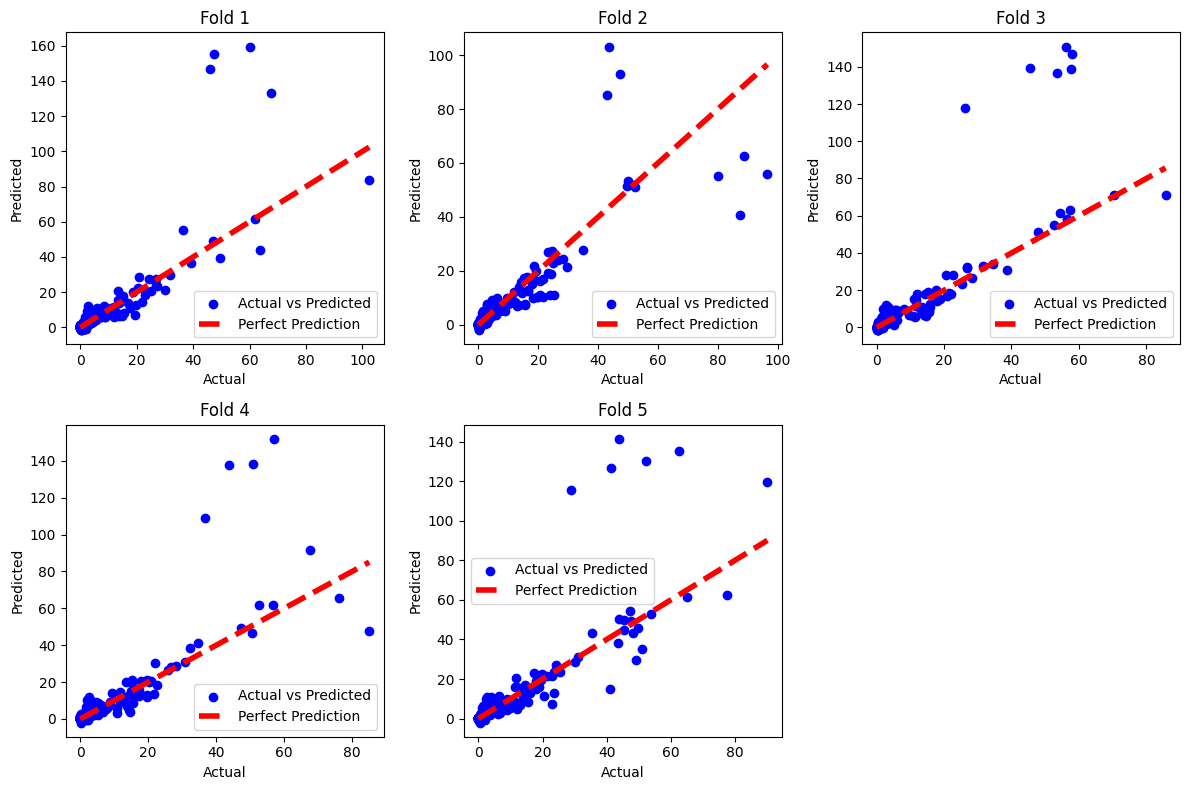

In [ ]:
# Initialize figure for plotting
plt.figure(figsize=(12, 8))

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_loss, test_loss, y_pred = train_evaluate_model(X_train, X_test, y_train, y_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    predictions.append((test_index, y_pred))

    # Plot actual vs predicted for each fold
    plt.subplot(2, 3, fold_idx + 1)
    plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Fold {fold_idx + 1}')
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
%pip install --upgrade Adapt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 1.7 MB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 28.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible.


In [ ]:
%pip install scikeras --quiet

##LSTM for the best fold with the best Train and Test loss

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', "supply_rate",'t_demand','gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap'].abs()  # Ensure non-negative gap values if negative gaps don't make sense in context

# Store the 'entity' column separately
entities = dff_pr['entity']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define the LSTM model function
def create_model():
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train and evaluate the model and return history
def train_evaluate_model(X_train, X_test, y_train, y_test):
    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=0)
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test).flatten()
    return train_loss, test_loss, y_pred, history

# Run cross-validation to find the best model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_losses = []
test_losses = []
predictions = []
histories = []





In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_loss, test_loss, y_pred, history = train_evaluate_model(X_train, X_test, y_train, y_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    predictions.append((test_index, y_pred))
    histories.append(history)

# Find the fold with the smallest test loss
best_fold_index = np.argmin(test_losses)
best_train_loss = train_losses[best_fold_index]
best_test_loss = test_losses[best_fold_index]
best_test_index, best_y_pred = predictions[best_fold_index]

print(f"Best Train Loss: {best_train_loss}")
print(f"Best Test Loss: {best_test_loss}")


7/7 [==============================] - 0s 3ms/step


7/7 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

In [ ]:

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities.iloc[best_test_index].values,
    'Actual': y.iloc[best_test_index].values,
    'Predicted': np.abs(best_y_pred)  # Ensure non-negative predictions if necessary
}).reset_index(drop=True)

print(results_df.tail())

     Entity     Actual  Predicted
205    Togo   1.310166   2.401044
206    Togo   1.257063   2.396586
207  Uganda  17.897222  20.560705
208  Uganda  15.197907  19.463652
209  Uganda  13.511458  19.998278


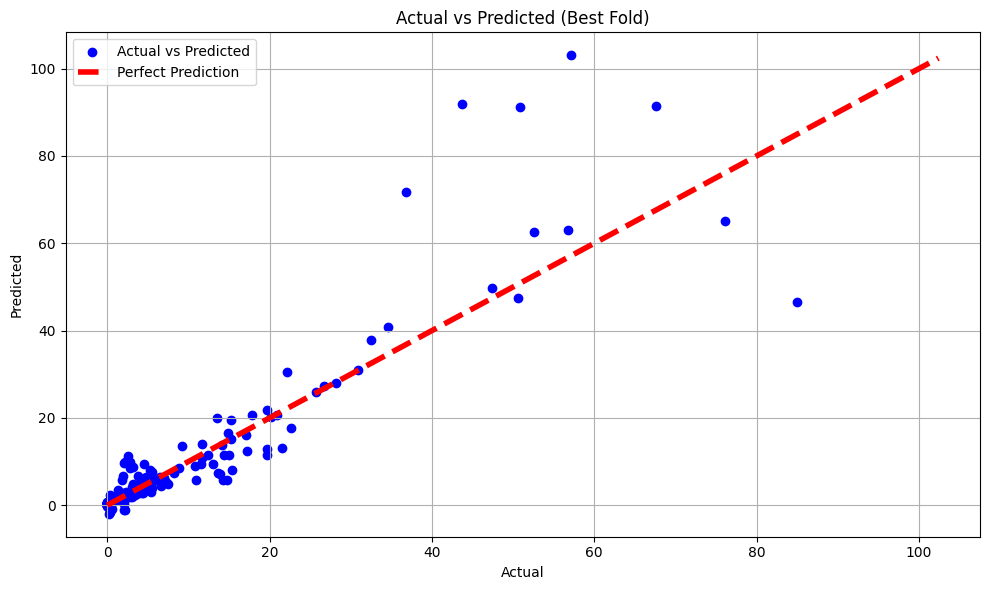

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y.iloc[best_test_index], best_y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Best Fold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

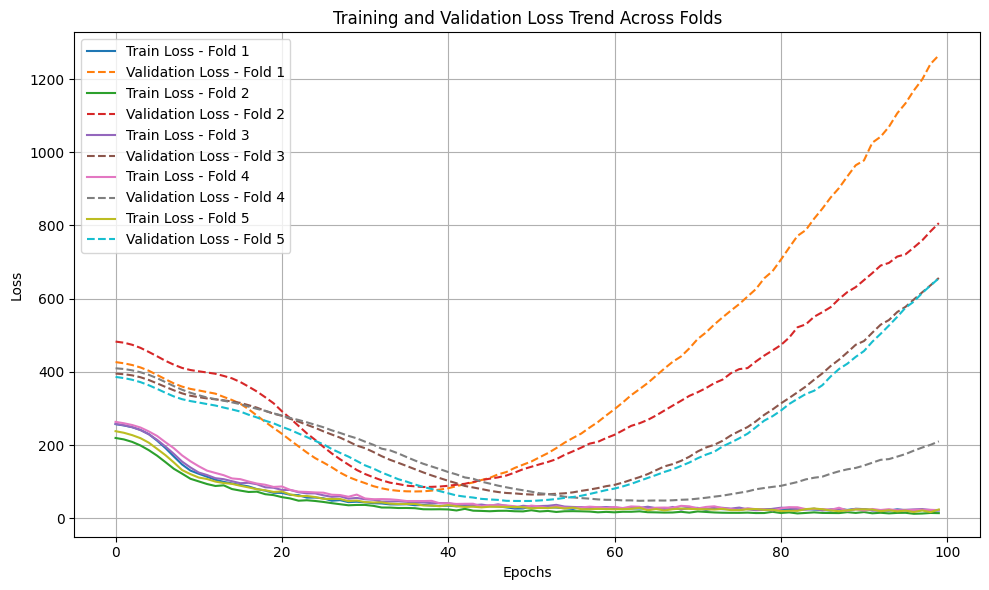

In [ ]:
# Plotting the loss trend across all folds
plt.figure(figsize=(10, 6))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Train Loss - Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Validation Loss - Fold {i+1}', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Trend Across Folds')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##Model Application

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have new data in `new_df`, and it's similar in structure to `X`
new_features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports',
                'el_demand_pc', 'fin_support', 'el_from_gas', 'pop_no_el_access_total',
                'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Ensure no missing values in the selected features
new_df = new_df.dropna(subset=new_features)

# Prepare the data for modeling (similar to how you prepared `X` in the training phase)
X_new = new_df[new_features]

# Standardize the features using the same scaler object from training phase
X_new_scaled = scaler.transform(X_new)

# Reshape data for LSTM model
X_new_scaled = X_new_scaled.reshape((X_new_scaled.shape[0], 1, X_new_scaled.shape[1]))

# Make predictions using the trained model
y_pred_new = model.predict(X_new_scaled).flatten()

# Assuming you have `entities` column in `new_df` to identify entities
entities_new = new_df['entity']

# Create a DataFrame to store the predictions and corresponding entities
results_new_df = pd.DataFrame({
    'Entity': entities_new,
    'Predicted Gap': y_pred_new
})

print(results_new_df.head())


#Feature Relevance Check

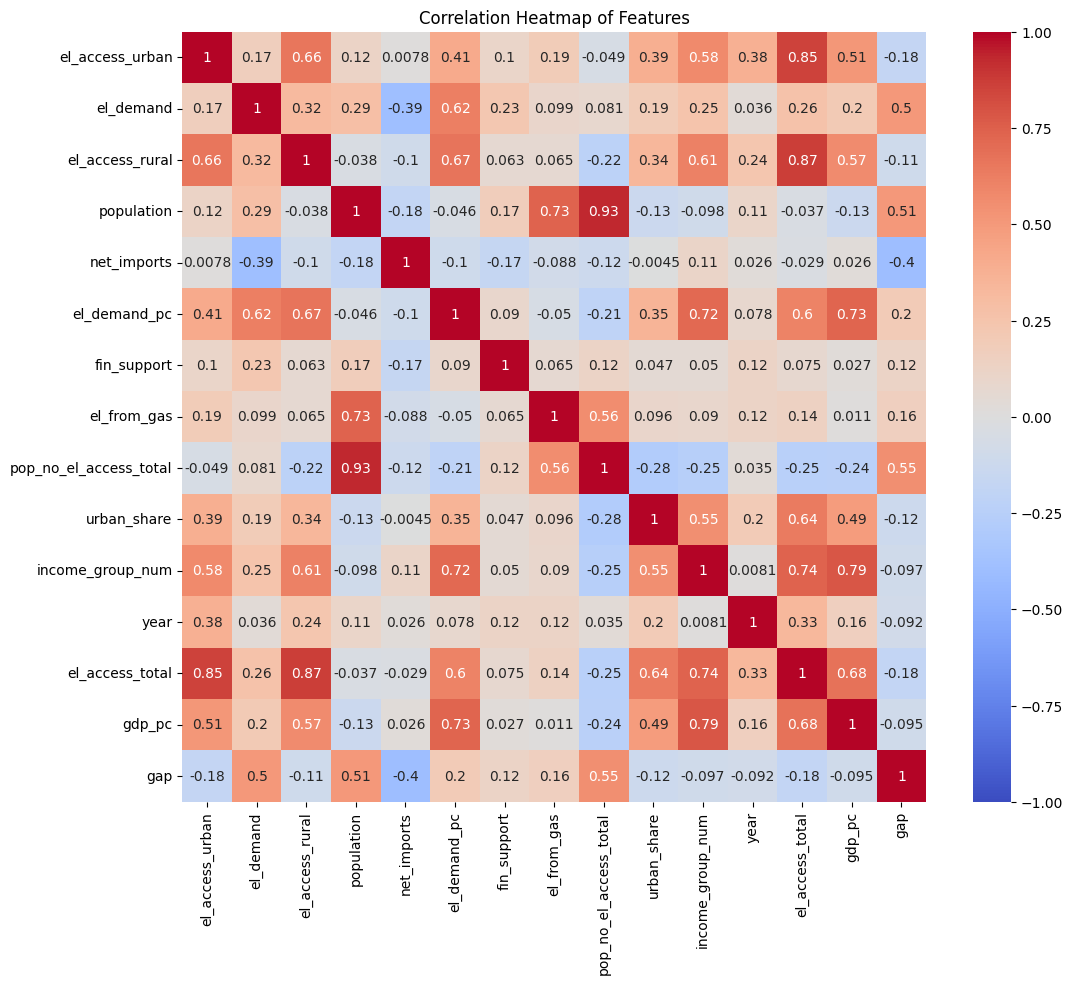

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe (replace `dff` with your actual data)
dff_pr = dff

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc', 'gap']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)
X = dff_pr[features]

# Compute Pearson correlation coefficients
correlation_matrix = X.corr()

# Plot heatmap of correlation coefficients
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()




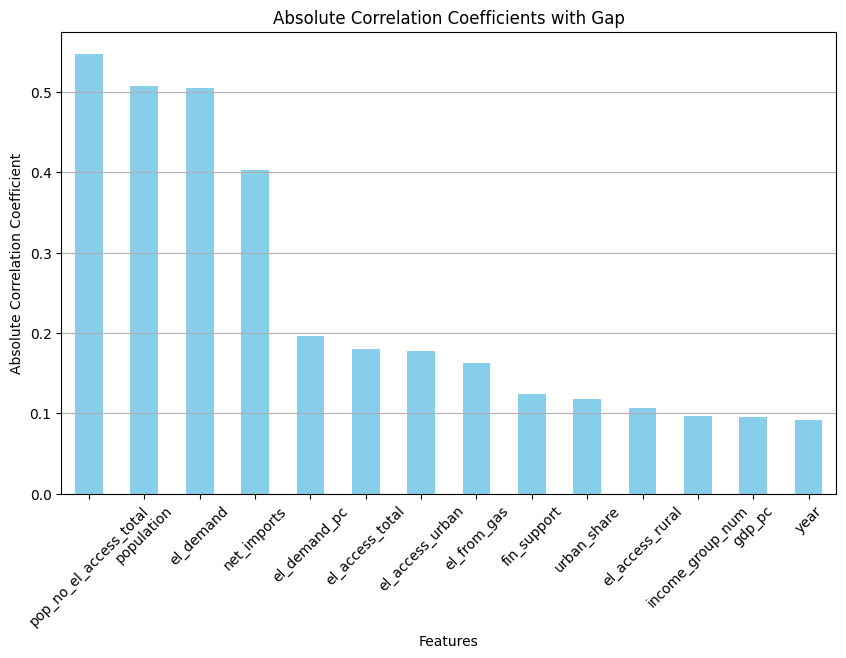

In [ ]:
# Plot bar chart of absolute correlation coefficients with 'gap'
plt.figure(figsize=(10, 6))
correlation_with_gap = correlation_matrix['gap'].drop('gap')  # Exclude 'gap' itself
correlation_with_gap_abs = correlation_with_gap.abs().sort_values(ascending=False)
correlation_with_gap_abs.plot(kind='bar', color='skyblue')
plt.title('Absolute Correlation Coefficients with Gap')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##Applying Dense

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error

# Load your dataframe
dff_pr = dff # Replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)
X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding if needed
# X = pd.get_dummies(X, columns=['income_group_num'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Define the LSTM model or other models
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


Epoch 1/100
16/16 [==============================] - 3s 48ms/step - loss: 269.9538 - val_loss: 218.7591
Epoch 2/100
16/16 [==============================] - 0s 17ms/step - loss: 246.1254 - val_loss: 198.8843
Epoch 3/100
16/16 [==============================] - 0s 26ms/step - loss: 216.3479 - val_loss: 176.0789
Epoch 4/100
16/16 [==============================] - 0s 23ms/step - loss: 197.6583 - val_loss: 151.6856
Epoch 5/100
16/16 [==============================] - 0s 23ms/step - loss: 158.7437 - val_loss: 129.7195
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 134.6174 - val_loss: 111.1286
Epoch 7/100
16/16 [==============================] - 0s 25ms/step - loss: 126.4547 - val_loss: 98.9591
Epoch 8/100
16/16 [==============================] - 0s 20ms/step - loss: 98.3896 - val_loss: 87.3786
Epoch 9/100
16/16 [==============================] - 0s 19ms/step - loss: 83.7618 - val_loss: 79.8823
Epoch 10/100
16/16 [==============================] - 0s 15ms/step - 

In [ ]:
# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred_abs = np.abs(y_pred)  # Take absolute values of y_pred

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred_abs  # Use y_pred_abs instead of y_pred
})

# Print the first few rows of the DataFrame
print(results_df.head())


14/14 [==============================] - 0s 2ms/step
   Entity    Actual  Predicted
0     NaN  4.500872   0.745399
2  Angola  4.926865   2.604574
3  Angola  5.284685   4.403318
5     NaN  6.300903   0.476031
7     NaN  5.400000   1.365684


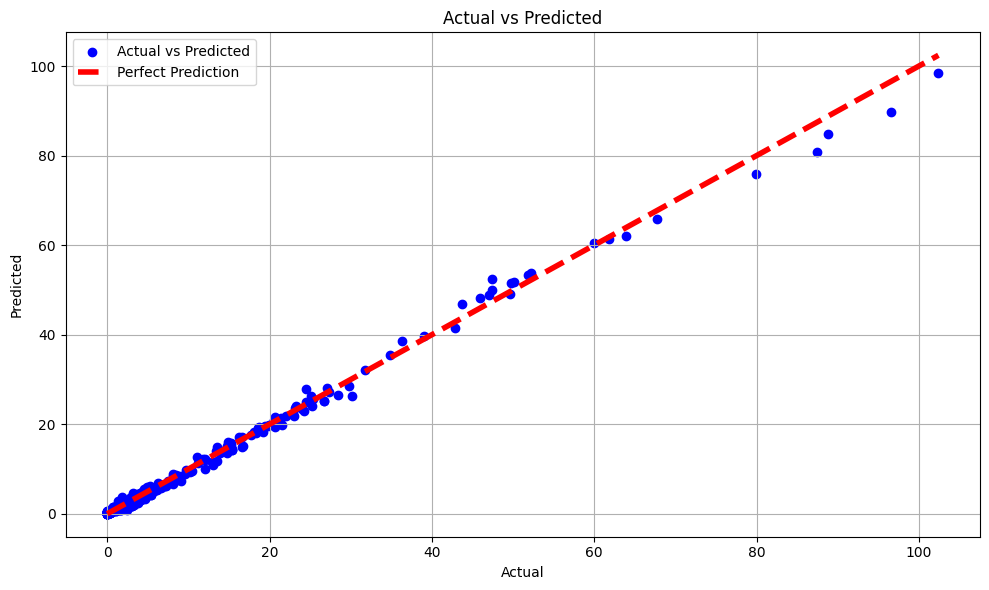

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_abs, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

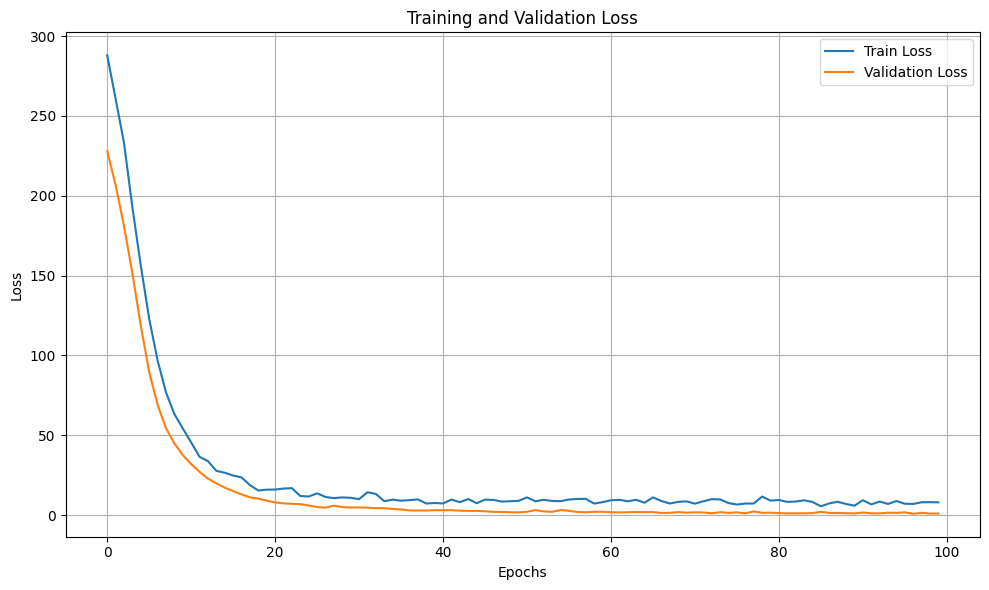

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Using EPOCH to evaluate the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load your dataframe (replace `df_no` with your actual data)
dff_pr = dff

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)
X = dff_pr[features]
y = dff_pr['gap'].abs()  # Ensure non-negative gap values

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and compile the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and track losses
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=0)

# Get the minimum train and test loss
lowest_train_loss = min(history.history['loss'])
lowest_test_loss = min(history.history['val_loss'])

# Print the lowest train and test losses
print(f"Lowest Train Loss: {lowest_train_loss}")
print(f"Lowest Test Loss: {lowest_test_loss}")





Lowest Train Loss: 17.836950302124023
Lowest Test Loss: 29.759883880615234


In [ ]:
# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred_abs = np.abs(y_pred)  # Take absolute values of y_pred

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred_abs  # Use y_pred_abs instead of y_pred
})

# Print the first few rows of the DataFrame
print(results_df.head())


14/14 [==============================] - 0s 2ms/step
         Entity    Actual  Predicted
352     Eritrea  0.500756   0.936726
689  Mauritania  1.963997   1.899100
485      Guinea  4.703410   4.178524
388    Eswatini  0.360149   1.157349
31        Benin  2.179834   1.234845


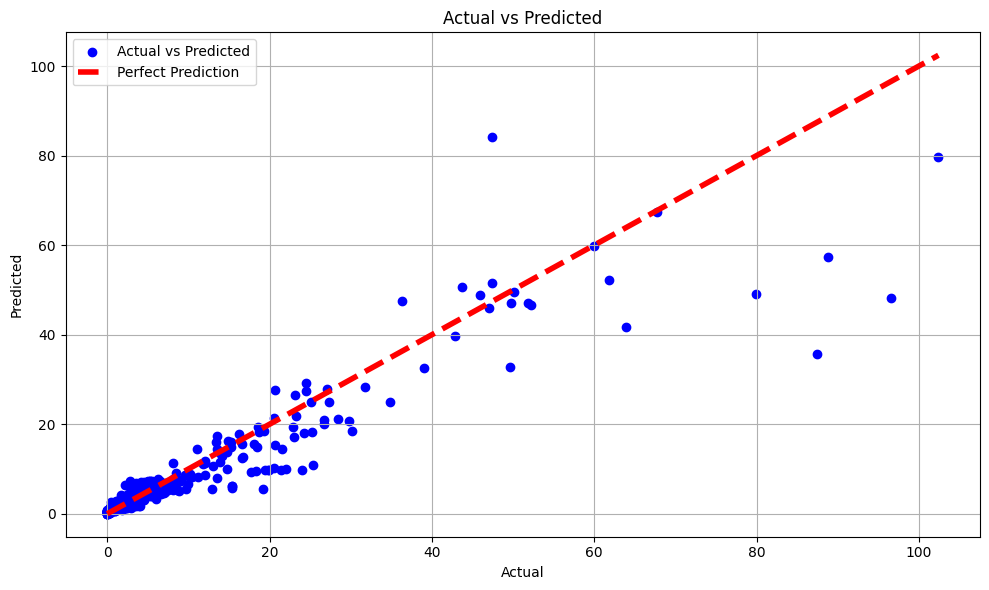

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_abs, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



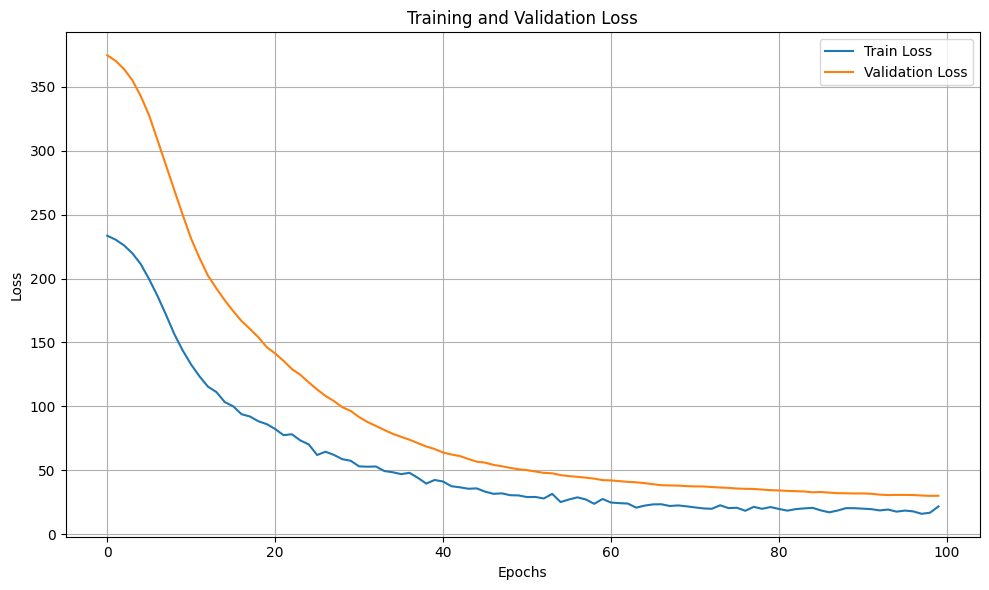

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Using LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load your dataframe (replace `dff` with your actual data)
dff_pr = dff

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)
X = dff_pr[features]
y = dff_pr['gap'].abs()  # Ensure non-negative gap values

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred_abs = np.abs(y_pred)  # Take absolute values of y_pred

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred_abs  # Use y_pred_abs instead of y_pred
})

# Print the first few rows of the DataFrame
print(results_df.head())






Epoch 1/100
16/16 [==============================] - 2s 24ms/step - loss: 295.4039 - val_loss: 246.5639
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 291.8992 - val_loss: 244.1471
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 288.5894 - val_loss: 241.3017
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 283.1269 - val_loss: 237.6125
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 276.8635 - val_loss: 232.5084
Epoch 6/100
16/16 [==============================] - 0s 12ms/step - loss: 268.6851 - val_loss: 226.1892
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 258.1256 - val_loss: 218.0056
Epoch 8/100
16/16 [==============================] - 0s 10ms/step - loss: 245.1010 - val_loss: 208.4855
Epoch 9/100
16/16 [==============================] - 0s 10ms/step - loss: 232.3960 - val_loss: 197.7311
Epoch 10/100
16/16 [==============================] - 0s 10ms/step

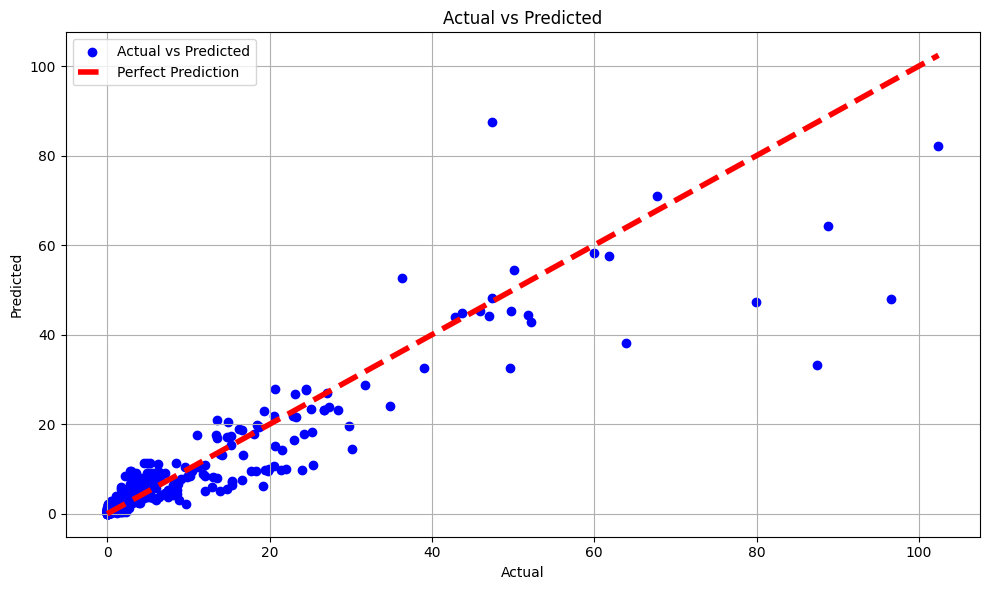

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_abs, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

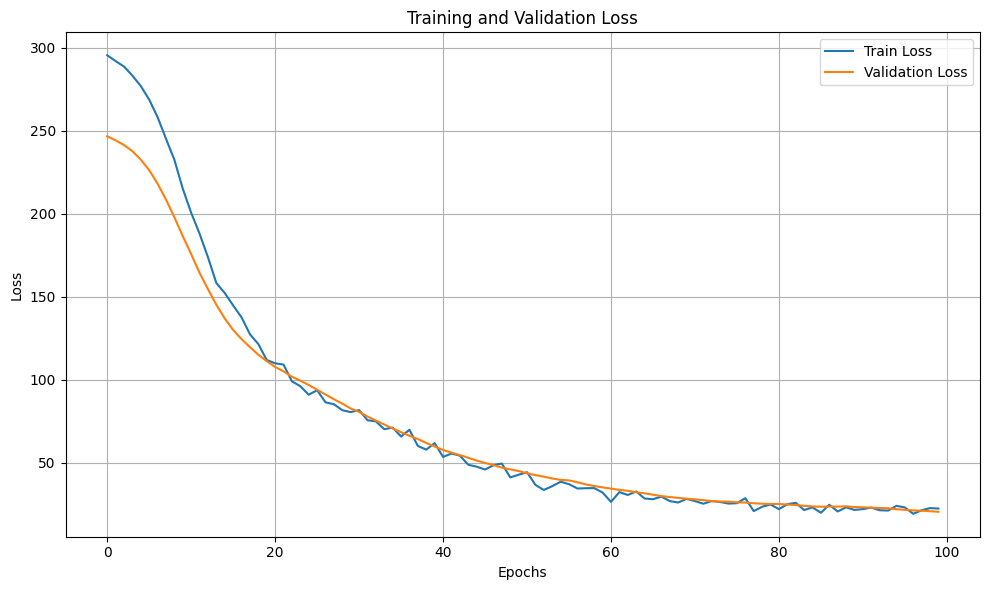

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##Using ARIMA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Load your dataframe (replace `dff` with your actual data)
dff_pr = dff

# Ensure no missing values in the selected features
features = ['year', 'gap']
dff_pr = dff_pr.dropna(subset=features)

# Prepare the data for modeling
dff_pr = dff_pr.sort_values(by='year')
dff_pr = dff_pr.drop_duplicates(subset=['year'])
dff_pr = dff_pr.set_index('year')
y = dff_pr['gap']

# Split the data into training and test sets
train_size = int(len(y) * 0.8)
train, test = y.iloc[:train_size], y.iloc[train_size:]

# Drop NaN values in test set
test = test.dropna()

# Fit the ARIMA model
p = 5  # AR order
d = 1  # differencing order
q = 0  # MA order

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())





                               SARIMAX Results                                
Dep. Variable:                    gap   No. Observations:                   18
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -57.514
Date:                Tue, 16 Jul 2024   AIC                            127.028
Time:                        16:52:13   BIC                            132.028
Sample:                             0   HQIC                           127.525
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6643      0.332     -2.002      0.045      -1.315      -0.014
ar.L2         -0.3118      0.356     -0.876      0.381      -1.010       0.386
ar.L3         -0.5413      0.566     -0.957      0.3

In [ ]:
# Forecast the test data
forecast = model_fit.forecast(steps=len(test))
y_pred = pd.Series(forecast, index=test.index)

# Calculate the MSE
mse = mean_squared_error(test, y_pred)
print(f'Test MSE: {mse}')

# Create a DataFrame to compare actual vs predicted
results_df = pd.DataFrame({'Actual': test, 'Predicted': y_pred})

# Print the first few rows of the DataFrame
print(results_df.head())

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', color='red')
plt.xlabel('Year')
plt.ylabel('Gap')
plt.title('Actual vs Predicted using ARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
